<div align='center'><font size="6" color="#FFA500">Getting started with Dimensionality Reduction Techniques in Python</font></div>

<div align='center'><font size="4" color="#FFA500">A 3 part serieson Dimensionality reduction techniques using the Kannada MNIST dataset</font></div>
<hr>


<p style='text-align:justify'><b>Key Objectives:</b> In this series of notebooks, we shall study about three Dimensionality reduction techniques using the Kannada MNIST dataset. The techniques are PCA, t-SNE and UMAP.</p>


* [Part 1: Visualizing Kannada MNIST with PCA](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-pca)
* [Part 2: Visualizing Kannada MNIST with t-SNE](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-t-sne)
* [Part 3: Visualizing Kannada MNIST with UMAP](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-umap-technique)
<hr>

<div align='center'><font size="5" color="#FFA500">What is Dimensionality Reduction</font></div>
<hr>

A lot of Machine Learning problems consists of hundreds to thousands of features. having such a large number of features poses certain problems mainly :

>* Slows down the training process
>* It becomes hard to find a good solution

This problem is also sometimes termed as **The Curse of Dimensionality** and **Dimensionality Reduction** or **Dimension reduction** is the process of reducing the number of random variables under consideration by obtaining a set of principal variables[1]. 

In other words, the goal is to take something that is very high dimensional and get it down to something that is easier to work with, without losing much of the information.

### Importance of Dimensionality Reduction :

* Getting down to two or three features can help us visualize our data which is an important part of data analysis
* Often a lot of dimensionality in the data is redundant and we can get rid of that that can be sueful for the machine learning process.
* Reducing the dimensionality can also help us in visualising the data easily.

For instance, the famous MNIST dataset is 784 dimensional when we unfold those digits into long vectors and we shouldn't really need 784 dimensions to describe a datapoint in this dataset. There should be some compact representation of this dataset and we should still be able to get some meaninful result.
<hr>

<div align='center'><font size="5" color="#FFA500">Main Approaches for Dimensionality Reduction</font></div>
<hr>

 
There are two main approaches to reducing dimensionality: **Projection** and **Manifold Learning**.

* **Projection** : This technique deals with projecting every data point which is in high dimension,  onto a subspace suitable lower-dimensional space in a way which approximately preserves the distances between the points[[2](https://en.wikipedia.org/wiki/Random_projection)]. For instance the figure below, the points in 3D are projected onto a 2D plane. This is a lower-dimensional (2D) subspace of the high-dimensional (3D) space and the axes correspond to new features z1 and z2 (the coordinates of the projections on the plane).

![](https://i0.wp.com/www.analyticsvidhya.com/wp-content/uploads/2015/07/Image-4.png?w=556&ssl=1)

Source : [Beginners Guide To Learn Dimension Reduction Techniques(https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/)

Keep in mind that projection may not always be the best method to achieve dimensional reduction.

- **Manifold Learning** : [Manifold learning](https://scikit-learn.org/stable/modules/manifold.html) is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. 

Jake VanderPlas explains Manifold Learning in a very intuitive way in his book :Python Data Science handbook and here is an excerpt from the book itself;

*"manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces. When you think of a manifold, I'd suggest imagining a sheet of paper: this is a two-dimensional object that lives in our familiar three-dimensional world, and can be bent or rolled in that two dimensions. In the parlance of manifold learning, we can think of this sheet as a two-dimensional manifold embedded in three-dimensional space.*

*Rotating, re-orienting, or stretching the piece of paper in three-dimensional space doesn't change the flat geometry of the paper: such operations are akin to linear embeddings. If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear. Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space."*
<hr>

<div align='left'><font size="6" color="#FFA500">Part1: Principal Component Analysis(PCA) in Python</font></div>
<hr>
PCA is a very common technique for dimensionality reduction. The idea behind it is very simple:
* Identify a Hyperplane that lies closest to the data
* Project the data onto the hyperplane.

![](https://i.stack.imgur.com/Q7HIP.gif)

[Projecting 2D-data to a line (PCA](https://i.stack.imgur.com/Q7HIP.gif)

However, it is important to choose the right hyperplane so that when the data is projected onto it, it the maximum amount of variation or information about how the original data is distributed. In other words, the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis.


### Principal Components

The axis that explains the maximum amount of variance int he training set is called the principal components. The axis othogonal to this axis is called the second principal component. Thus in 2D, there will be 2 principal components. However, for a higher dimensions, PCA would find a third component orthogonal to the other two components and so on.

![](https://hackernoon.com/hn-images/1*WRKdN-NYF0mMumhfOXVa2Q.png)

Source : [A Layman’s Introduction to Principal Components](https://hackernoon.com/a-laymans-introduction-to-principal-components-2fca55c19fa0)

## Implementing PCA using Scikit Learn

[Scikit-Learn’s](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) PCA class implements PCA using SVD decomposition. Let's apply PCA on Kannada MNIST data set for visualization.

## 1. PCA for Visualisation


An effective way to visualize high-dimensional data is to represent each data object by a two-dimensional point in such a way that similar objects are represented by nearby points, and that dissimilar objects are represented by distant points. The resulting two-dimensional points can be visualized in a scatter plot. This leads to a map of the data that reveals the underlying structure of the objects, such as the presence of clusters.Let's see how we can use PCA to do that.

### Loading the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

### Loading and Reading the data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



train = pd.read_csv('../input/Kannada-MNIST/train.csv')
test = pd.read_csv('../input/Kannada-MNIST/test.csv')
train.head()


/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/sample_submission.csv


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
## Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values


In [4]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [5]:
## Importing and Apply PCA

pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(60000, 2)

In [6]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07972071 0.05570993]


Text(0, 0.5, 'Principal Component 2')

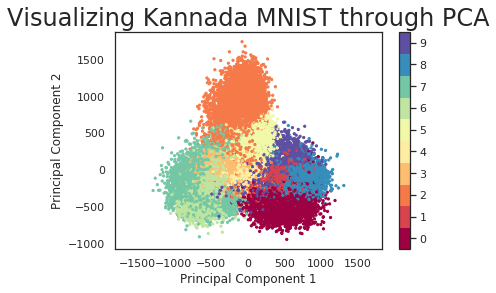

In [7]:
# Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

The full data is a 784-dimensional point cloud, and these colored points are the projection of each data point along the directions with the largest variance. 

This representation makes it possible for us to see the layout of the digits in two dimensions. Another important thing to note here is that we have achieved this in an unsupervised manner—that is, without reference to the labels.

In [8]:
## Using 3 Principal Components

pca = PCA(n_components=3) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(60000, 3)

In [9]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07972071 0.05570993 0.04466606]


The above graph shows that eventhough the components were able to hold some information, however, it isn't able to clearly set apart different digits. Fortunately, there are other dimensionality reduction techniques which we will see in future kernels that do a better job than PCA.

## Choosing the right number of components

The thumb rule is to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%). However, if your goal is to visualise the dataset then make sure not to choose more than 2 or 3 dimensions, since the goal then would be to reduce the dimensions.

In [10]:

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x)


You could also plot the explained variance as a function of the number of dimensions. There will an elbow in the curve, where the explained variance stops growing fast. 

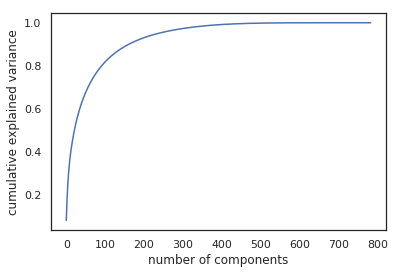

In [11]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## 2. PCA for for Noise Filtering

PCA can also be used to filter unwanted noise from the data. The idea behind this concept is that components which have variance higher than that of noise should remain reasonably affected by noise. Thus if we reconstruct the data with only the largest group of principal components, we can easily filter out the noise from our data

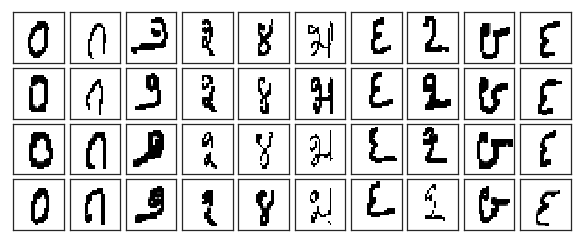

In [12]:
## Plotting the original train data without noise

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

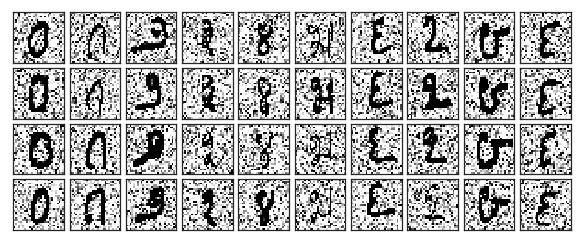

In [13]:
## Introducing some random noise

np.random.seed(42)
noisy = np.random.normal(x, 10)
plot_digits(noisy)


In [14]:
## Training a PCA on noisy data and letting the projection preserve 50% of the variance:

pca = PCA(0.50).fit(noisy)
pca.n_components_

24

Here 50% of the variance amounts to 24 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

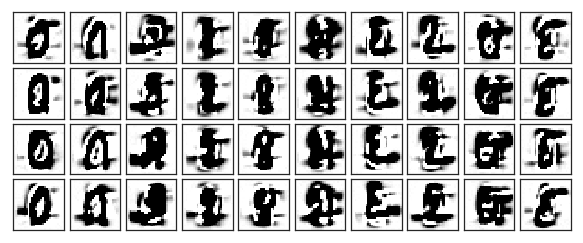

In [15]:
#using the inverse of the transform to reconstruct the filtered digits:

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Drawbacks of PCA

The main drawback of PCA is that it is highly influenced by outliers in the data. There are a couple of variants in Scikit-learn like RandomizedPCA and SParsePCA. Have a look at documentation to know more.


## Unearthing Bias using PCA
Sometimes models learn things that are a cause for concern especially when machine learning models are used to make decisions for humans. PCA and other dimensionality reduction techniques can really help us to understand the relationship between points in large datasets. Here is how I used PCA to visualise the Word2Vec model and searched for the word **Engineer** to see its nearest neighbours. I also fixed an axis that goes from **man to woman** so words close to man lie towards left while words similar to woman will be found on the right. Let’s look at the results for our anchor word which is Engineer, given the above axis.

![](https://miro.medium.com/max/856/1*swOOiho9ontVxPurXKncsw.png)

It appears that the word engineer is already closer to man than woman. The words closer to man are in orange and include astronomer, physicist, mathematician while words like dancer, songwriter, teacher appear closer to woman.
How about changing the anchor word to math? Are the results affected? 

![](https://miro.medium.com/max/1190/1*rsPf7BqmM2lbHY4lqynIAQ.png)

We have words like computational, geometry, arithmetic next to man, while the nearest neighbours to woman are music, teaching, philosophy etc.
Imagine if a machine learning algorithm trained on this dataset is used to predict how good someone is at their job related to art or math? Also, what will happen if a company relies on such an algorithm to hire potential engineers? The model might mistakenly believe that gender affected how good a candidate they were and the resulting decisions will be gender biased.

**Note :** : The tool used for the above projections is called [Embedding Projector](http://projector.tensorflow.org/) : a web application tool that interactively visualizes embeddings by reading them from our model and rendering them in two or three dimensions.  

## References

* Python Data Scinece Handbook by Jake VanderPlas
* Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow by Aurelien Geron

### Additional Reading : 
 * Colah's blog on the topic is an excellent resource . : https://colah.github.io/posts/2014-10-Visualizing-MNIST/  
 *  If you want to get into the mathematics see this great page : https://www.math.hmc.edu/calculus/tutorials/eigenstuff/
 * Visualizing Bias in Data using Embedding Projector : https://towardsdatascience.com/visualizing-bias-in-data-using-embedding-projector-649bc65e7487